# this is to show how double transport affect rate performance, will produce Fig. 3,4,5.

In [48]:
# magic lines that avoid re-start
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)

In [50]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/Paper/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
Target  = 'Rate_Performance/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [51]:
# define parameter of double and single 
Para_dict_Same = {
   ################################# Same for single and double:
   "Mesh list":[ [20,10,20,60,30], ],   # Simon uses 30
   "Para_Set":[ "Li2023_ECdrag",],
   # solvent diffusion parameters:
   "EC initial concentration in electrolyte [mol.m-3]":[3500],
   "Typical EC concentration [mol.m-3]":[3500,],

   "Negative electrode porosity":[0.25],
   "SEI resistivity [Ohm.m]":[2e5,],
   "Initial inner SEI thickness [m]":[1.2362e-08,],
   "Initial outer SEI thickness [m]":[2.5e-9,],
   "Contact resistance [Ohm]":[6e-3],
   "Cation transference number":[
    "electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con"],
   "Electrolyte conductivity [S.m-1]":[
    "electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con"],
   "Electrolyte diffusivity [m2.s-1]":[
    "electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con"],
}

Para_dict_DD_ONLY = {
     "Model option":[{
      "SEI": "constant",
      "SEI porosity change": "true",
      #"SEI on cracks": "true",
      "solvent diffusion": "double spatial consume w refill",
      "electrolyte conductivity": "sol full"  ,
     "contact resistance":"true",  
      },],
     ################################# Need to be different between single and double:
     "EC Lithium ion cross diffusivity [m2.s-1]":[
        "Cross_diffusivity_1p5E_10","Cross_diffusivity_1p5E_12",], # 
     "EC diffusivity in electrolyte [m2.s-1]":[
        "EC_diffusivity_5E_10"],
     "EC transference number":[
        "EC_transference_number",],
     "Measured dLJP_dcEC": ["dLJP_Two_Species_dco_Jung2023",],
     "Measured dLJP_dce": ["dLJP_Two_Species_dce_Jung2023",],
}
Para_dict_SD_ONLY = {
     "Model option":[{
      "SEI": "constant",
      "SEI porosity change": "true",
      #"SEI on cracks": "true",
      "solvent diffusion": "single no consume wo refill",
      "electrolyte conductivity": "full"  ,
      "contact resistance":"true",
      },],
     ################################# fake, must have only one option
     "EC Lithium ion cross diffusivity [m2.s-1]":[
        "Cross_diffusivity_1p5E_10"],
     "EC diffusivity in electrolyte [m2.s-1]":[
        "EC_diffusivity_5E_10"],
     "EC transference number":[
        "EC_transference_number",],
     "Measured dLJP_dce":["dLJP_One_Specie_dce_Jung2023",]
}
Para_dict_DD = {**Para_dict_Same,**Para_dict_DD_ONLY}
Para_dict_SD = {**Para_dict_Same,**Para_dict_SD_ONLY}
Para_DD = [];  Para_SD=[];
recursive_scan(Para_DD,Para_dict_DD, list(Para_dict_DD.keys()), {})
recursive_scan(Para_SD,Para_dict_SD, list(Para_dict_SD.keys()), {})
print(len(Para_DD),len(Para_SD))

2 1


In [52]:
book_name_xlsx = 'Test.xlsx';sheet_name_xlsx = 'Results';
Path_Exp_Crate = "D:/OneDrive - Imperial College London/SimDataSave/InputData/Ruihe_newLGM50_Crate/"
Path_pack = [BasicPath,Target,Path_Exp_Crate,book_name_xlsx,sheet_name_xlsx,];

In [53]:
# Three set of solution:
Rate_Dis_All = [1,1.5, 2,2.25,2.5,2.6,2.7,2.8,2.9, 3, ]; 
DD_HDx_Crate = Scan_Crate_Paper(
    0.0, Para_DD[0], Path_pack , "DD_HDx",
    Rate_Dis_All,True,)
DD_LDx_Crate = Scan_Crate_Paper(
    1.0, Para_DD[1], Path_pack , "DD_LDx",
    Rate_Dis_All,True,)
SD_Crate = Scan_Crate_Paper(
    2.0, Para_SD[0], Path_pack , "SD",
    Rate_Dis_All,True,)

Start Now! Scan 0.


At t = 0.00557069, , mxstep steps taken before reaching tout.
At t = 0.00779756, , mxstep steps taken before reaching tout.
At t = 0.00736152 and h = 8.45552e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00916035, , mxstep steps taken before reaching tout.
At t = 0.00919158, , mxstep steps taken before reaching tout.


Finish DD_HDx - Scan=0.0
Start Now! Scan 1.


At t = 0.00562903, , mxstep steps taken before reaching tout.
At t = 0.00785805, , mxstep steps taken before reaching tout.
At t = 0.00742258, , mxstep steps taken before reaching tout.
At t = 0.00921133, , mxstep steps taken before reaching tout.
At t = 0.0093182, , mxstep steps taken before reaching tout.


Finish DD_LDx - Scan=1.0
Start Now! Scan 2.


At t = 0.00555834, , mxstep steps taken before reaching tout.
At t = 0.00780953, , mxstep steps taken before reaching tout.
At t = 0.00738583, , mxstep steps taken before reaching tout.
At t = 0.00921228, , mxstep steps taken before reaching tout.
At t = 0.00931462, , mxstep steps taken before reaching tout.


Finish SD - Scan=2.0


' plt.savefig(BasicPath + Target+"Fig_3-Summary Crate.png", dpi=1000)\nplt.savefig(\n        BasicPath + Target + \n        f\'Fig_3-Summary Crate.svg\')  '

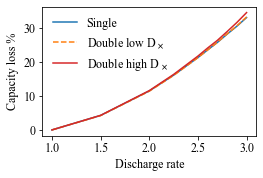

In [54]:
# plot the effect of charge / discharge rate and Dx
fs = 12
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
Str=[ 'DFN',   'Double trans' ]; # Str_model =[ 'Model_DFN',   'Model_DD' ]
fig, axs = plt.subplots( figsize=(9/2.54,6/2.54), layout='constrained')
Colors = ['#1f77b4','#2ca02c',  '#d62728', '#ff7f0e'];
LS = ['-','--','-',];MS=['none','none','h']; ms = 8

y_temp = SD_Crate['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[0],linestyle=LS[0],label=r"Single") # marker = MS[0], markersize = ms,

y_temp = DD_LDx_Crate['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[3],linestyle=LS[1], label=r"Double low D$_\times$") # marker = MS[1],markerfacecolor='w',markersize = ms,

y_temp = DD_HDx_Crate['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[2],linestyle=LS[0], label=r"Double high D$_\times$") # marker = MS[0], markersize = ms,

axs.set_ylabel("Capacity loss %")
axs.set_xlabel("Discharge rate")
axs.set_xlabel("Discharge rate")
#axs.set_ylim(3.9,5.1);   # axs[1].set_ylim(3.9,5.1)

#axs[0].set_title(r"$D_\times=1.5\bullet10^{-12}  m^2/s$", fontdict={'family':'Times New Roman','size':fs})
#axs[1].set_title(r"$D_\times=1.5\bullet10^{-10}  m^2/s$", fontdict={'family':'Times New Roman','size':fs})
axs.legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False,)
#axs.legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False,)
""" plt.savefig(BasicPath + Target+"Fig_3-Summary Crate.png", dpi=1000)
plt.savefig(
        BasicPath + Target + 
        f'Fig_3-Summary Crate.svg')  """

In [ ]:
# Plot concentration stuff:
# Line - 1: Li+ concentration, EC concentration, "EC:EMC wt%" (to check with paper)
# Line -2 diffusivity and conducitivity, cation transference number, 
# Line -3: concentraiton decompisition, in detail 


In [61]:
sol_dd_LDx.cycles[0].steps

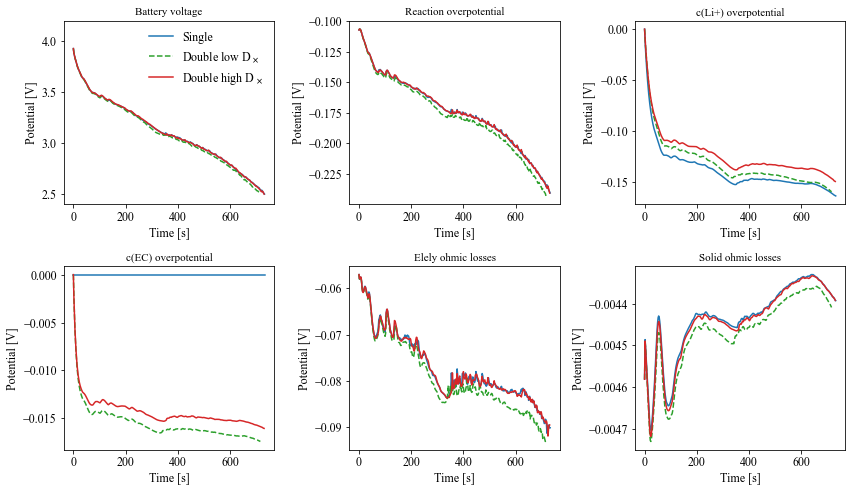

In [66]:
# plot voltage stuff:
fs = 12
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
LS = ['-','--','-',];
Crate_index = -1
sol_sd = SD_Crate['Sol_All'][Crate_index]
sol_dd_HDx = DD_HDx_Crate['Sol_All'][Crate_index]
sol_dd_LDx = DD_LDx_Crate['Sol_All'][Crate_index]
Sol_All = [sol_sd,sol_dd_HDx,sol_dd_LDx];
Str = ["Single",r"Double low D$_\times$",r"Double high D$_\times$"]
fig, axs = plt.subplots(2,3, figsize=(12,7),tight_layout=True)
Keys_t_var = [
    "Battery voltage [V]",
    "X-averaged battery reaction overpotential [V]",
    "X-averaged battery concentration overpotential [V]",
    "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    "X-averaged battery electrolyte ohmic losses [V]",
    "X-averaged battery solid phase ohmic losses [V]",
]
Title_keys = [
    "Battery voltage",
    "Reaction overpotential",
    "c(Li+) overpotential",
    "c(EC) overpotential",
    "Elely ohmic losses",
    "Solid ohmic losses"
]
for k,sol in enumerate(Sol_All):
    time_1 = sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0]
    for i in range(0,6): # 0 1 2 3 4 5 --> [0,0] [0,1], [0,2], [1,0], [1,1], [1,2]   
        var =  sol.cycles[0].steps[1][Keys_t_var[i]].entries
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(time_1, var,color=Colors[k],linestyle=LS[k],label=Str[k]) # label="1st cycle"
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'Times New Roman','size':fs-1})
        axs[m,n].set_ylabel("Potential [V]",   fontdict={'family':'Times New Roman','size':fs})
        axs[m,n].set_xlabel('Time [s]',   fontdict={'family':'Times New Roman','size':fs})
        #axs[m,n].set_ylim(-1.2,0.5)
        
        labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
        axs[0,0].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)  
    axs[0,0].set_ylim(2.4,4.2)

(None, <AxesSubplot:xlabel='Time [h]'>)

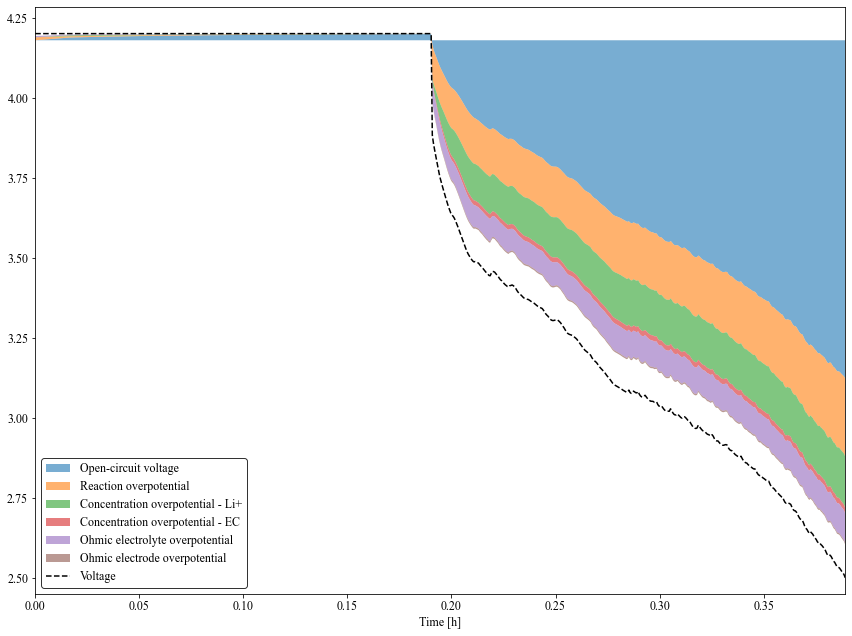

In [78]:
fig, ax = plt.subplots(figsize=(12,9),tight_layout=True)
pybamm.plot_voltage_components(
    sol_dd_HDx, ax=ax, show_legend=True, testing=False, 
)

In [73]:
sol_dd_HDx["X-averaged battery open circuit voltage [V]"](0)

array(4.17921545)

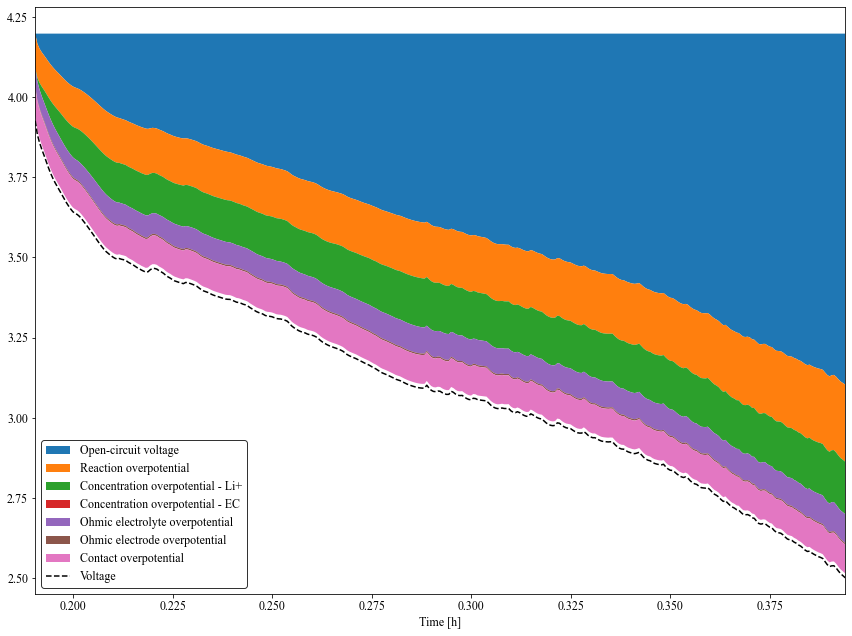

In [87]:
# Set a default value for alpha, the opacity

show_legend = True
fig, ax = plt.subplots(figsize=(12,9),tight_layout=True)
overpotentials = [
    "X-averaged battery reaction overpotential [V]",
    "X-averaged battery concentration overpotential [V]",
    "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    "X-averaged battery electrolyte ohmic losses [V]",
    "X-averaged battery solid phase ohmic losses [V]",
    "Contact overpotential [V]",
]
labels = [
    "Reaction overpotential",
    "Concentration overpotential - Li+",
    "Concentration overpotential - EC",
    "Ohmic electrolyte overpotential",
    "Ohmic electrode overpotential",
    "Contact overpotential",
]

# Plot
# Initialise
solution = sol_sd.cycles[0].steps[1]
time = solution["Time [h]"].entries # 
initial_ocv = solution["X-averaged battery open circuit voltage [V]"].entries[0]
ocv = solution["X-averaged battery open circuit voltage [V]"].entries
ax.fill_between(time, ocv, initial_ocv,  label="Open-circuit voltage")
top = ocv
# Plot components
for overpotential, label in zip(overpotentials, labels):
    if overpotential == "Contact overpotential [V]":
        bottom = top - solution[overpotential].entries
    else:
        bottom = top + solution[overpotential].entries
    ax.fill_between(time, bottom, top,   label=label)
    top = bottom

V = solution["Terminal voltage [V]"].entries
ax.plot(time, V, "k--", label="Voltage")

if show_legend:
    leg = ax.legend(loc="lower left", frameon=True)
    leg.get_frame().set_edgecolor("k")

# Labels
ax.set_xlim([time[0], time[-1]])
ax.set_xlabel("Time [h]")

y_min, y_max = 0.98 * min(np.nanmin(V), np.nanmin(ocv)), 1.02 * (
    max(np.nanmax(V), np.nanmax(ocv))
)
ax.set_ylim([y_min, y_max])
plt.show()

In [140]:
# only overpotential, and three components:
Crate_index = -1
Colors_a = [
    [31/255, 119/255, 180/255, 0.5], # like blue
    [44/255, 160/255, 44/255,  0.7], # like green  
    [214/255, 39/255, 40/255,  0.7], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 
sol_dd_HDx = DD_HDx_Crate['Sol_All'][Crate_index]
step_CD = sol_dd_HDx.cycles[0].steps[1]
time = step_CD["Time [s]"].entries - step_CD["Time [s]"].entries[0] # 
zeros = 0*np.ones_like(time)
ocv = step_CD["X-averaged battery open circuit voltage [V]"].entries
Total_overpotential = ocv - step_CD["Terminal voltage [V]"].entries;
eta_c_e = -step_CD["X-averaged battery concentration overpotential [V]"].entries
eta_c_EC = -step_CD["X-averaged EC concentration overpotential [V]"].entries
V = step_CD["Terminal voltage [V]"].entries
eta_others = ocv - eta_c_e - eta_c_EC - V
eta_tot = ocv - V
fig, ax = plt.subplots(figsize=(6,4),tight_layout=True)
ax.plot(time, ocv, "k--", ) # label="Open-circuit voltage"
ax.fill_between(time, ocv-eta_c_e, ocv, color=Colors_a[1], label="Li+ overpotential")
ax.fill_between(time, ocv-eta_c_e-eta_c_EC, ocv-eta_c_e, color=Colors_a[3],  label="EC overpotential")
ax.fill_between(time, V, ocv-eta_c_e-eta_c_EC,  color=Colors_a[0],  label="Others")

ax.plot(time, V, "k-", ) # label="Terminal voltage"

leg = ax.legend(loc="best", frameon=False)
ax.set_xlim([time[0], time[-1]])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")
ax.set_ylim([2.3,4.3])
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [136]:
# cyc based 
def Get_Vol_Component(DD_HDx_Crate):
    DD_HDx_Crate['Cyc Mean eta_c_e'] = []
    DD_HDx_Crate['Cyc Mean eta_c_EC'] = []
    DD_HDx_Crate['Cyc Mean eta_others'] = []
    DD_HDx_Crate['Cyc Mean eta_tot'] = []
    DD_HDx_Crate['Cyc Mean eta_c_e %'] = []
    DD_HDx_Crate['Cyc Mean eta_c_EC %'] = []
    DD_HDx_Crate['Cyc Mean eta_others %'] = []
    for sol in DD_HDx_Crate['Sol_All']:
        step_CD = sol.cycles[0].steps[1]
        ocv = step_CD["X-averaged battery open circuit voltage [V]"].entries
        eta_c_e = -step_CD[
            "X-averaged battery concentration overpotential [V]"].entries
        eta_c_EC = -step_CD[
            "X-averaged EC concentration overpotential [V]"].entries
        V = step_CD["Terminal voltage [V]"].entries
        eta_others = ocv - eta_c_e - eta_c_EC - V
        eta_tot = ocv - V
        mean_eta_c_e = np.mean(eta_c_e)
        mean_eta_c_EC = np.mean(eta_c_EC)
        mean_eta_others = np.mean(eta_others)
        mean_eta_c_tot = np.mean(eta_tot)
        DD_HDx_Crate['Cyc Mean eta_c_e'].append(np.mean(eta_c_e))
        DD_HDx_Crate['Cyc Mean eta_c_EC'].append(np.mean(eta_c_EC))
        DD_HDx_Crate['Cyc Mean eta_others'].append(np.mean(eta_others))
        DD_HDx_Crate['Cyc Mean eta_tot'].append(np.mean(eta_tot))
        DD_HDx_Crate['Cyc Mean eta_c_e %'].append(
            mean_eta_c_e/mean_eta_c_tot*100)
        DD_HDx_Crate['Cyc Mean eta_c_EC %'].append(
            mean_eta_c_EC/mean_eta_c_tot*100)
        DD_HDx_Crate['Cyc Mean eta_others %'].append(
            mean_eta_others/mean_eta_c_tot*100)
    return DD_HDx_Crate
DD_HDx_Crate = Get_Vol_Component(DD_HDx_Crate)
DD_LDx_Crate = Get_Vol_Component(DD_LDx_Crate)
SD_Crate     = Get_Vol_Component(SD_Crate)

TypeError: 'NoneType' object is not subscriptable

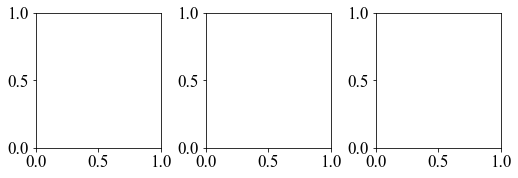

In [142]:
fig, axs = plt.subplots(1,3 , figsize=(18/2.54,6/2.54), layout='constrained')
Colors = ['#1f77b4','#2ca02c',  '#d62728', '#ff7f0e'];
LS = ['-','--','-',];MS=['none','none','h']; ms = 8

axs[0].plot(Rate_Dis_All,SD_Crate['Cyc Mean eta_tot'],color=Colors[0],linestyle=LS[0],label=r"Single") # marker = MS[1],markerfacecolor='w',markersize = ms,
axs[1].plot(Rate_Dis_All,SD_Crate['Cyc Mean eta_c_EC'],color=Colors[0],linestyle=LS[0],label=r"Single")
axs[2].plot(Rate_Dis_All,SD_Crate['Cyc Mean eta_c_e'],color=Colors[0],linestyle=LS[0],label=r"Single")

axs[0].plot(Rate_Dis_All,DD_LDx_Crate['Cyc Mean eta_tot'],color=Colors[3],linestyle=LS[1], label=r"Double low D$_\times$")
axs[1].plot(Rate_Dis_All,DD_LDx_Crate['Cyc Mean eta_c_EC'],
    color=Colors[3],linestyle=LS[1],label=r"Double low D$_\times$")
axs[2].plot(Rate_Dis_All,DD_LDx_Crate['Cyc Mean eta_c_e'],
    color=Colors[3],linestyle=LS[1],label=r"Double low D$_\times$")

axs[0].plot(Rate_Dis_All,DD_HDx_Crate['Cyc Mean eta_tot'],color=Colors[2],linestyle=LS[2], label=r"Double high D$_\times$")
axs[1].plot(Rate_Dis_All,DD_HDx_Crate['Cyc Mean eta_c_EC'],
    color=Colors[2],linestyle=LS[2],label=r"Double high D$_\times$")
axs[2].plot(Rate_Dis_All,DD_HDx_Crate['Cyc Mean eta_c_e'],
    color=Colors[2],linestyle=LS[2],label=r"Double high D$_\times$")


axs[0].set_ylabel("Capacity loss %")
axs[0].set_xlabel("Discharge rate")


Text(0.5, 1.0, 'Potential error')

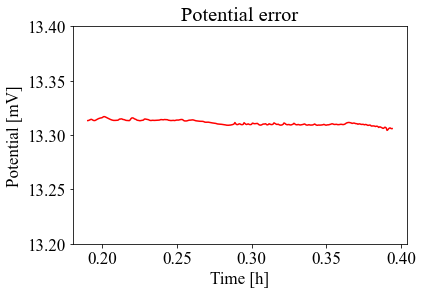

In [90]:
fs = 17
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
plt.plot(time, (bottom-V)*1e3, "r-", label="Voltage")
plt.ylabel("Potential [mV]",   fontdict={'family':'Times New Roman','size':fs})
plt.xlabel('Time [h]',   fontdict={'family':'Times New Roman','size':fs})
plt.ylim(1.32e1,1.34e1)
plt.title("Potential error")

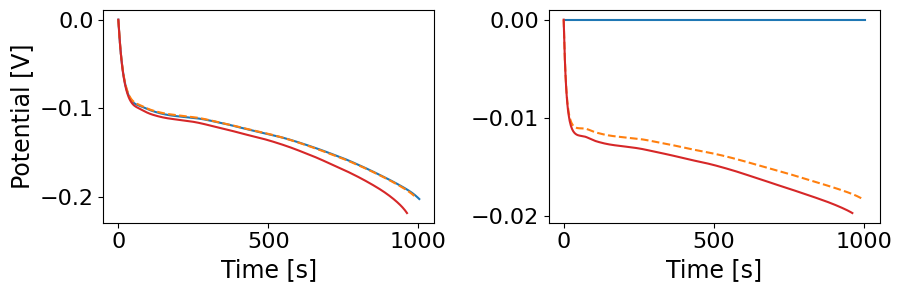

In [31]:
# for paper: to plot only c_EC and c_Li+
Crate_index = -1;   
LS = ['-','--','-','--'];
fig, axs = plt.subplots(1,2, figsize=(9.3,3.2),tight_layout=True)

sol = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 

sol = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[3],linestyle=LS[3],label=r"Double-Low $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[3],linestyle=LS[3],label=r"Double-Low $D_\times$") 


sol = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[2],linestyle=LS[2],label=r"Double-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[2],linestyle=LS[2],label=r"Double-High $D_\times$") 

axs[0].set_ylabel("Potential [V]",fontsize=fs)
axs[1].set_xlabel("Time [s]",fontsize=fs)
axs[0].set_xlabel("Time [s]",fontsize=fs)
#axs[0].set_ylim(-0.24,0.02); axs[1].set_ylim(-0.24,0.02);
#axs[0].set_xlim(-20,1200); axs[1].set_xlim(-20,1200);
#axs[0].set_xticklabels(np.arange(0,1500,500),fontsize=fs-2)    
#axs[1].set_xticklabels([0,500,1000 ],fontsize=fs-2)    
# axs[0].legend(prop={'family':'Times New Roman','size':fs-5},loc='best',frameon=False)  
#axs[0].set_title(r"Li$^+$ overpotential",fontdict={'family':'Times New Roman','size':fs+1})
#axs[1].set_title(r"EC overpotential",fontdict={'family':'Times New Roman','size':fs+1})
plt.savefig(BasicPath + Target+"Fig. 2 - 3C discharge vol decompos.png", dpi=800)

Time selected is 961.9999999999998 and 961.9999999999998,961.9999999999998 ,961.9999999999995 s


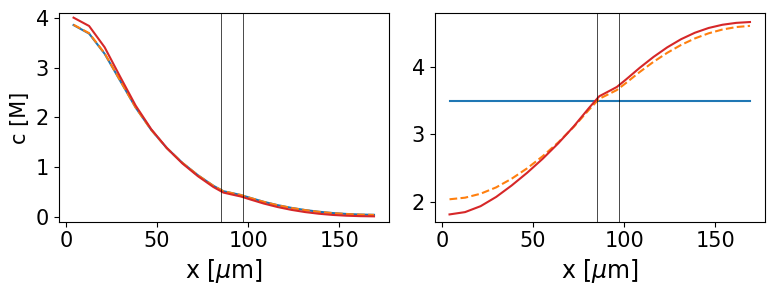

In [32]:
# compare electrolyte properties: roughly end of 6C discharge, but make it fair
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i
font = {'family' : 'Times New Roman','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte concentration [mol.m-3]",
    "EC concentration [mol.m-3]",
]
Title_keys = [
    "c(Li+)",
    "c(EC)",
]
Colors = ['#1f77b4','#2ca02c',  '#d62728', '#ff7f0e']; 
LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Double' ]

Crate_index = -1 # Rate_Dis_All = [0.5,2,4,6,8,10]
sol_Single_High = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
time_Single_High = (sol_Single_High.cycles[0].steps[1]['Time [s]'].entries-sol_Single_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
sol_Double_High = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
time_Double_High = (sol_Double_High.cycles[0].steps[1]['Time [s]'].entries-sol_Double_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Single_Low = TDF_Dis_All[1][0]['MyDict_All'][Crate_index]['Solution']
time_Single_Low = (sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Double_Low = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
time_Double_Low = (sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

t_select = min(time_Single_High[-2],time_Double_High[-2],time_Single_Low[-2],time_Double_Low[-2])
i_Single_High = FindClose(time_Single_High,t_select)
i_Double_High = FindClose(time_Double_High,t_select)
i_Single_Low = FindClose(time_Single_Low,t_select)
i_Double_Low = FindClose(time_Double_Low,t_select)

print(f'Time selected is {time_Single_High[i_Single_High]} and {time_Double_High[i_Double_High]},{time_Single_Low[i_Single_Low]} ,{time_Double_Low[i_Double_Low]} s')

fig, axs = plt.subplots(1,2, figsize=(8,3.2),tight_layout=True)
for i in range(2):
    x_Single_High =   sol_Single_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_High =   sol_Single_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_High]
    x_Single_Low =   sol_Single_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_Low =   sol_Single_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_Low]
    x_Double_High =   sol_Double_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_High =   sol_Double_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_High]
    x_Double_Low =   sol_Double_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_Low =   sol_Double_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_Low]
    axs[i].plot(x_Single_High*1e6, y_Single_High/1e3, color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
    #axs[i].plot(x_Single_Low, y_Single_Low/1e3, color=Colors[1],linestyle=LS[1],label=r"Single-Low $D_\times$") 
    axs[i].plot(x_Double_Low*1e6, y_Double_Low/1e3, color=Colors[3],linestyle=LS[1],label=r"Double-Low $D_\times$") 
    axs[i].plot(x_Double_High*1e6, y_Double_High/1e3, color=Colors[2],linestyle=LS[0],label=r"Double-High $D_\times$") 
    
    #axs[i].set_title(Title_keys[i],fontdict={'family':'Times New Roman','size':fs})
    axs[i].set_xlabel(x_loc[0],   fontdict={'family':'Times New Roman','size':fs})
    axs[i].ticklabel_format( 
        axis='x', style='sci',
        scilimits=[-1e3,1e3], useOffset=None, 
        useLocale=None, useMathText=None)
axs[0].set_ylabel("c [M]")
Y_0p = np.arange(-1,6,0.1)
axs[0].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
axs[0].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
axs[1].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
axs[1].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
axs[0].set_xlabel(r"x [$\mu$m]",   fontdict={'family':'Times New Roman','size':fs})
axs[1].set_xlabel(r"x [$\mu$m]",   fontdict={'family':'Times New Roman','size':fs})
# axs[0,0].legend(prop={'family':'Times New Roman','size':fs-5},loc='best',frameon=False)  
axs[0].set_ylim([-0.1,4.1])
axs[1].set_ylim([1.7,4.8])

# fig.suptitle(f"3C Discharge, t={round(t_select)} s", fontsize=fs+1)
plt.savefig(BasicPath +  Target+ f"3C Discharge, t={round(t_select)} s concentration profile.png", dpi=600)  